<a href="https://colab.research.google.com/github/sprakhar778/Demo-/blob/main/X_Ray_Image_Annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
uploaded = files.upload()



Saving instances_default.json to instances_default.json


In [11]:
import json

# Load the JSON data
with open('instances_default.json') as f:
    data = json.load(f)

# # Print the JSON data
# print(data)
print(type(data))
print(data.keys())
# print(data['categories'])
categories=data['categories']
# print(len(categories))
categories_dict={}
for i in range(len(categories)):
  categories_dict[categories[i]['id']]=categories[i]['name']
print(categories_dict)



<class 'dict'>
dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])
{1: 'Lobar Consolidation', 2: 'Cavitations', 3: 'Bronchiectasis', 4: 'Hilar Lymphadenopathy', 5: 'Pleural Effusion', 6: 'Military Opacities', 7: 'Collapse', 8: 'Fibronodular Opacities', 9: 'Pleural Thickening', 10: 'Calcifications', 11: 'Patchy Linear and Nodular Opacities', 12: 'Fibrocalcific Opacities', 13: 'Focal Segmental Opacities', 14: 'Bulging Fissure', 15: 'Lung Abcess', 16: 'Air Fluid Level', 17: 'Parapnuemonic Effusion', 18: 'Pneumatocele', 19: 'Peribronchial Thickening', 20: 'Interstitial Infiltrates', 21: 'Bronchopnuemonia', 22: 'Irregular Nodule', 23: 'Spiculation', 24: 'Hillar Mass', 25: 'Rib Erosion', 26: 'Tuberculosis', 27: 'Bacterial Pyrogenic Pneumonia', 28: 'Viral Pneumonia', 29: 'Lung Cancer', 30: 'Normal Chest X-Ray', 31: 'Abnormal Chest X-Ray', 32: 'Hyperinflation', 33: 'Destroyed Lungs', 34: 'Flattened Diaphragm', 35: 'Nodular Infiltrates', 36: 'Cardiomegaly', 37: 'Mediastinal L

In [12]:
# print(data['images'])
images=data['images']
images_dict={}

for i in range(len(images)):

  images_dict[images[i]['id']]=images[i]['file_name']



print(images_dict)
# print(len(images_dict))

{1: '01 (1).png', 2: '01 (10).png', 3: '01 (100).png', 4: '01 (101).png', 5: '01 (102).png', 6: '01 (103).png', 7: '01 (104).png', 8: '01 (105).png', 9: '01 (106).png', 10: '01 (107).png', 11: '01 (108).png', 12: '01 (109).png', 13: '01 (11).png', 14: '01 (110).png', 15: '01 (111).png', 16: '01 (112).png', 17: '01 (113).png', 18: '01 (114).png', 19: '01 (115).png', 20: '01 (116).png', 21: '01 (117).png', 22: '01 (118).png', 23: '01 (119).png', 24: '01 (12).png', 25: '01 (120).png', 26: '01 (121).png', 27: '01 (122).png', 28: '01 (123).png', 29: '01 (124).png', 30: '01 (125).png', 31: '01 (126).png', 32: '01 (127).png', 33: '01 (128).png', 34: '01 (129).png', 35: '01 (13).png', 36: '01 (130).png', 37: '01 (131).png', 38: '01 (132).png', 39: '01 (133).png', 40: '01 (134).png', 41: '01 (135).png', 42: '01 (136).png', 43: '01 (137).png', 44: '01 (138).png', 45: '01 (139).png', 46: '01 (14).png', 47: '01 (140).png', 48: '01 (141).png', 49: '01 (142).png', 50: '01 (143).png', 51: '01 (144).p

In [13]:
import pandas as pd
# print(data['annotations'])
annotations=data['annotations']

df = pd.DataFrame(annotations, columns=['image_id', 'category_id', 'bbox'])

# print(len(data['annotations']))

df = df.drop_duplicates(subset=['image_id'])
df['image_path'] = df['image_id'].map(images_dict)
df['category_label'] = df['category_id'].map(categories_dict)
df.head()


,image_id,category_id,bbox,image_path,category_label
0,1,30,"[94.18, 104.27, 1324.31, 1418.66]",01 (1).png,Normal Chest X-Ray
1,2,30,"[58.39, 250.69, 1473.98, 1574.85]",01 (10).png,Normal Chest X-Ray
2,3,20,"[868.59, 188.87, 780.92, 1187.64]",01 (100).png,Interstitial Infiltrates
3,4,32,"[84.42, 231.17, 1487.0, 1652.94]",01 (101).png,Hyperinflation
4,5,30,"[133.23, 133.55, 1486.99, 1526.04]",01 (102).png,Normal Chest X-Ray


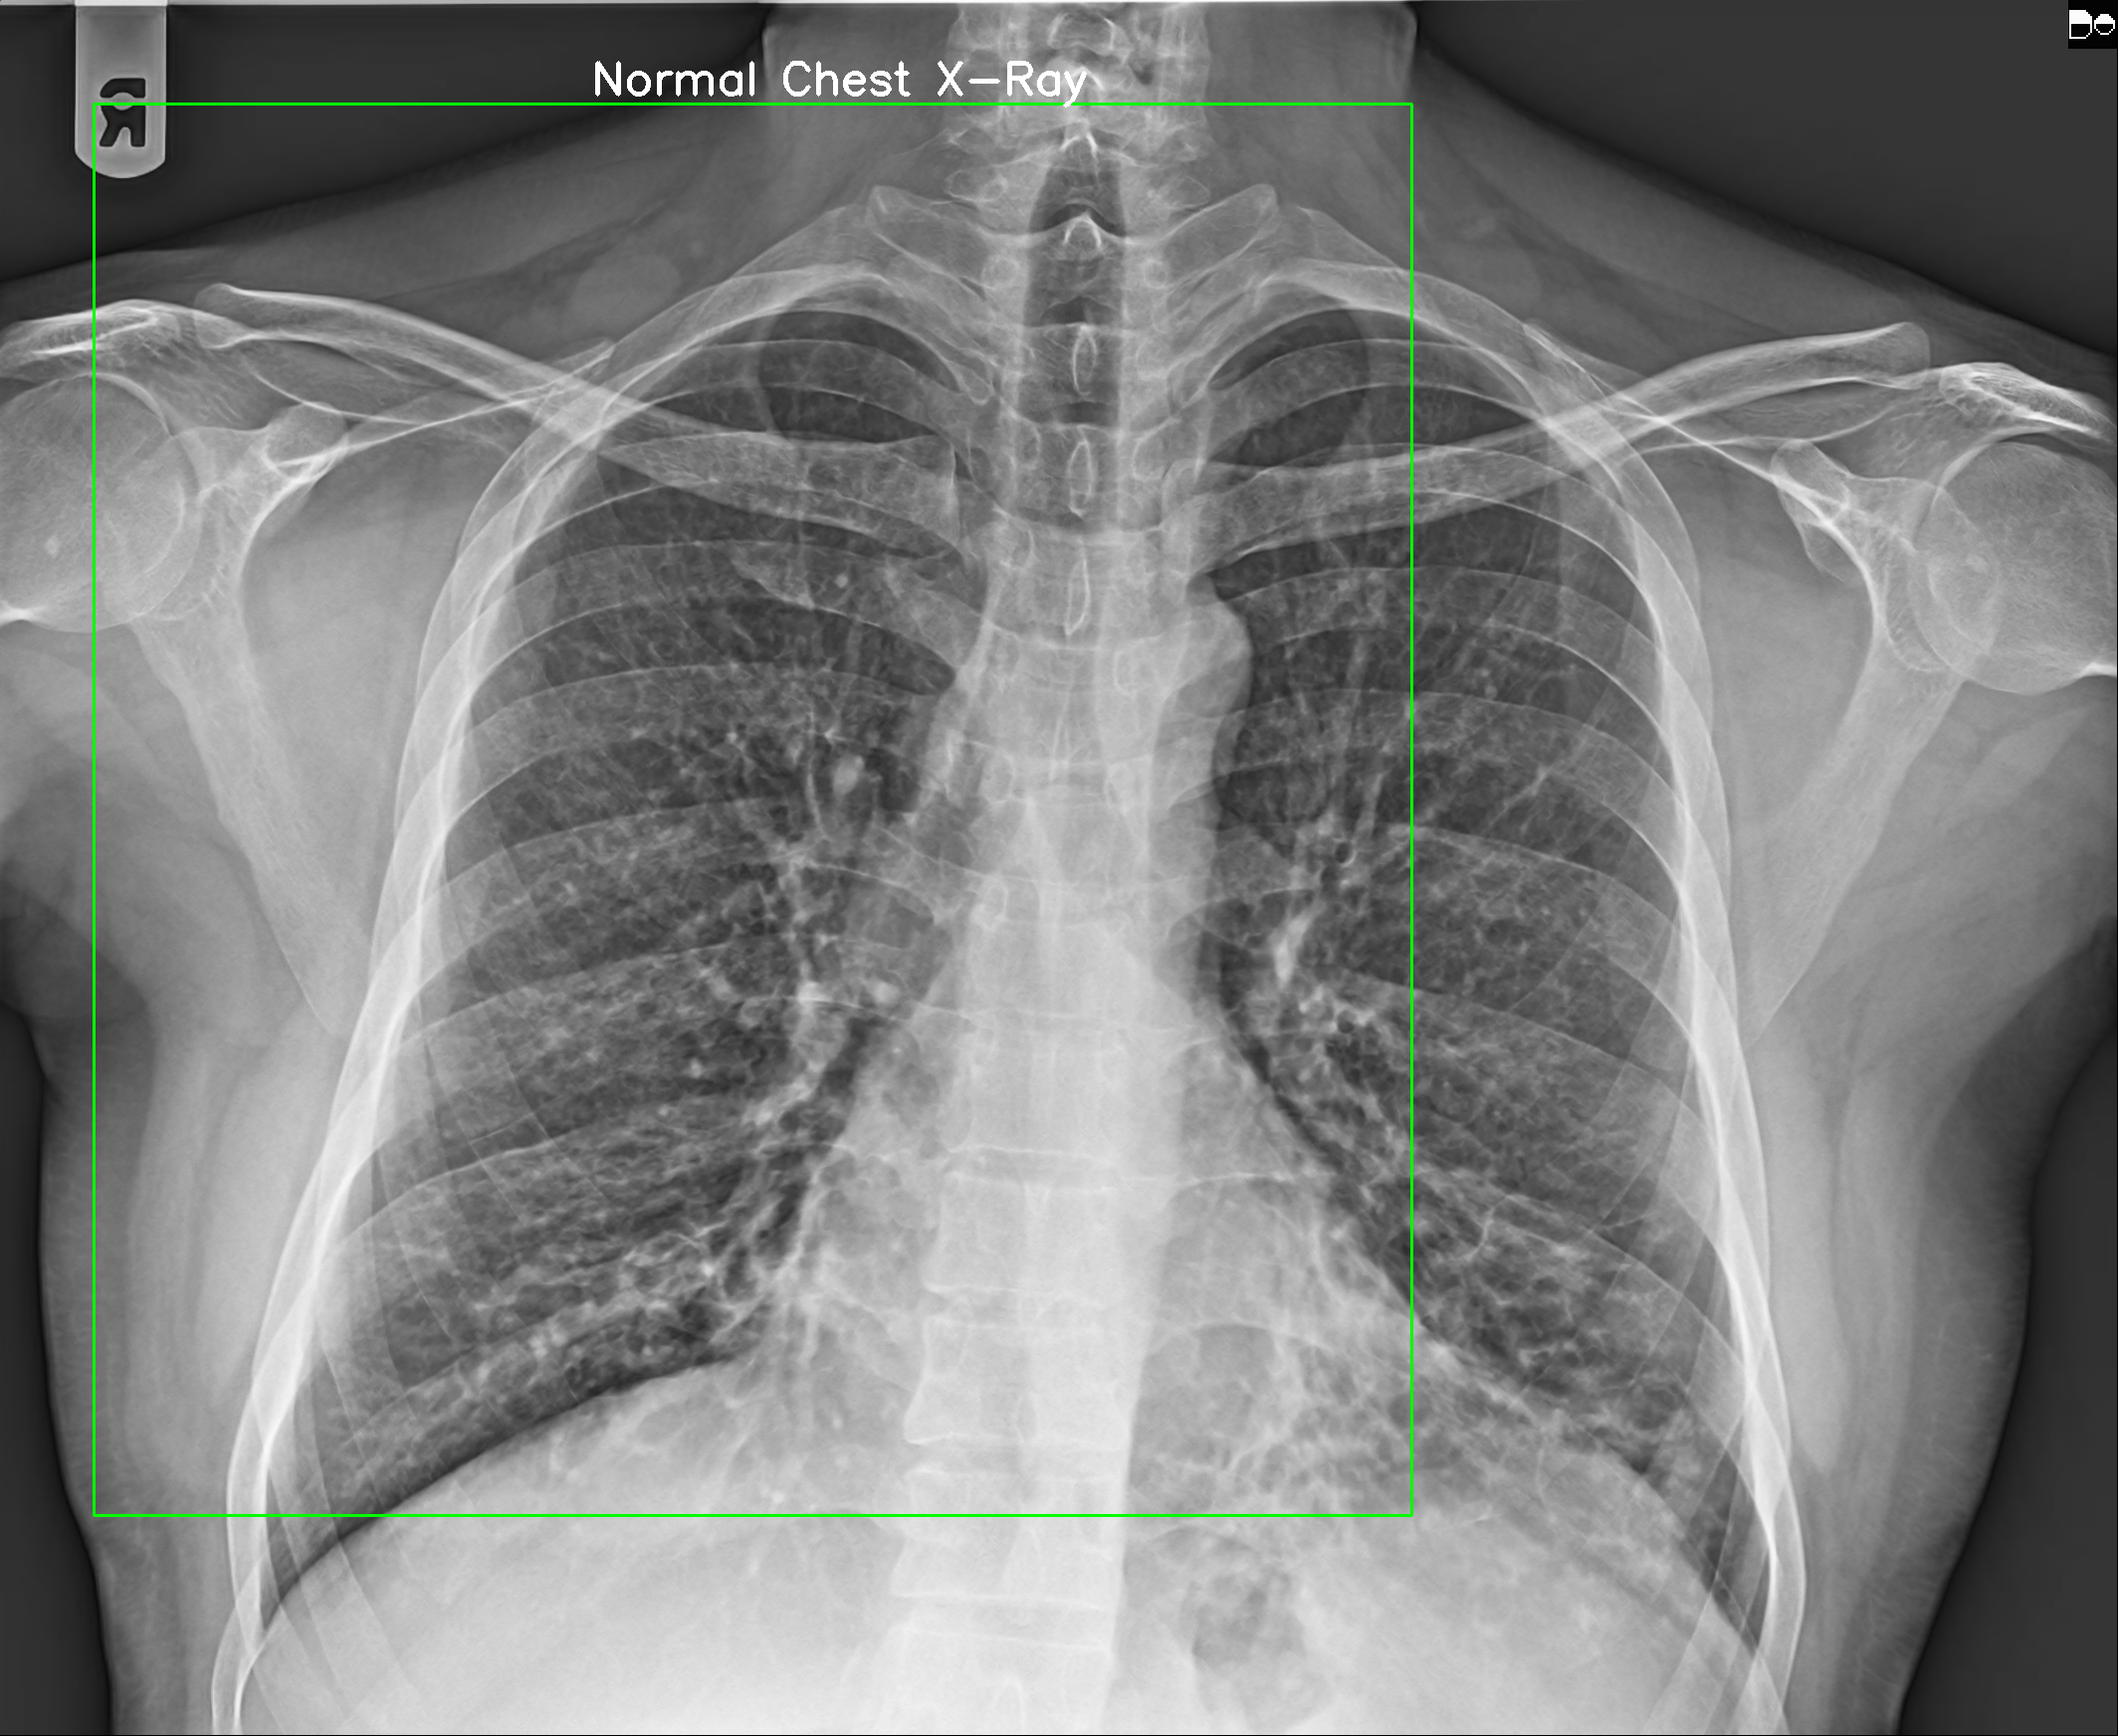

In [15]:
#create df with label sno,image_path,category_id,category_label,bbox
import cv2
from google.colab.patches import cv2_imshow
def draw_bbox_on_image(row, image_folder):
    # Construct the full image path
    image_path = f"/content/01 (129).png"

    # Read the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Failed to load image at {image_path}")
        return

    # Extract bounding box coordinates (convert to int for OpenCV)
    x, y, width, height = map(int, row['bbox'])

    # Define the color for the bounding box (BGR format)
    color = (0, 255, 0)  # Green

    # Define the thickness of the bounding box
    thickness = 2

    # Draw the bounding box
    cv2.rectangle(image, (x, y), (x + width, y + height), color, thickness)

    # Define the font, size, and thickness for the label
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.5
    font_thickness = 4

    # Put the label text on the image
    label_text = row['category_label']
    cv2.putText(image, label_text, (x+500, y - 10), font, font_scale, (255, 255, 255), font_thickness)

    # Display the image (Optional)
    cv2_imshow(image)
draw_bbox_on_image(df.iloc[0], '')